# Time Series Data Analysis-2

## Month-to-Month Analysis
In this section, we explore how values change from one month to the next, allowing us to detect seasonality and short-term patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np 

### Monthly data Aggregation
- We prompt the user to specify a year (16–18) and a month (e.g., 1–12 for January to December).
- Construct a file path dynamically to load the corresponding CSV file containing the time-series data for all the months of given year.
- The selected data is then read into a pandas dataframe (df), which becomes the basis for further analysis.

In [2]:
import os
current_dir = os.getcwd()

file_path18 = []
file_path17 = []
file_path16 = []
for j in range(12):
    file_path18.append(os.path.join(current_dir, f"f 2018 {j+1}.csv"))
    file_path17.append(os.path.join(current_dir, f"f 2017 {j+1}.csv"))
    file_path16.append(os.path.join(current_dir, f"f 2016 {j+1}.csv"))

In [3]:
import pandas as pd

dtype_dict = {
    'f': 'float32'  # Convert numeric columns to float32 to reduce memory usage
}


In [4]:
df18 = [pd.read_csv(file, dtype=dtype_dict) for file in file_path18]

In [5]:
df17 = [pd.read_csv(file, dtype=dtype_dict) for file in file_path17]

In [6]:
df16 = [pd.read_csv(file, dtype=dtype_dict) for file in file_path16]

In [7]:
df = [df16,df17,df18]

In [8]:
#For which year would you like a month to month analysis?(16 - 18)
var=16

In [9]:
dff = df[var - 16]

In [10]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

### Metrics Calculation
- Mean: The average value of the frequency variable (f) for all the months in the selected year.
- Standard Deviation: The variability of the frequency data around the mean.
- Skewness: The asymmetry of the frequency distribution.

In [11]:
mean = []
for i in range(12):
    alt = dff[i]
    mean.append(alt['f'].mean())
print(f'The MEAN of the months in year 20{var} from January to December is:')
mean

The MEAN of the months in year 2016 from January to December is:


[50.000126,
 49.999954,
 49.999332,
 49.999886,
 49.999596,
 49.99984,
 49.99971,
 49.99976,
 49.999607,
 50.00025,
 49.99959,
 49.999355]

In [12]:
stdev = []
for i in range(12):
    alt = dff[i]
    stdev.append(alt['f'].std())
print(f'The STANDARD DEVIATION of the months in year 20{var} from January to December is:')
stdev

The STANDARD DEVIATION of the months in year 2016 from January to December is:


[1.0277817249298096,
 0.9537572264671326,
 1.0323139429092407,
 0.9820886254310608,
 1.015234112739563,
 0.9863903522491455,
 1.0234166383743286,
 1.0027436017990112,
 0.9922378659248352,
 1.0020440816879272,
 0.9889589548110962,
 1.0189467668533325]

In [13]:
skew = []
for i in range(12):
    alt = dff[i]
    skew.append(alt['f'].skew())
print(f'The SKEWNESS of the months in year 20{var} from January to December is:')
skew

The SKEWNESS of the months in year 2016 from January to December is:


[0.18413661,
 0.17962934,
 0.16257153,
 0.21715383,
 0.1926185,
 0.17057034,
 0.18004876,
 0.24801944,
 0.30347863,
 0.18840456,
 0.15077758,
 0.13207896]

## Visualization
Clear month to month changes of mean, standard deviation and skewness for the given year to visualize changes within the year.

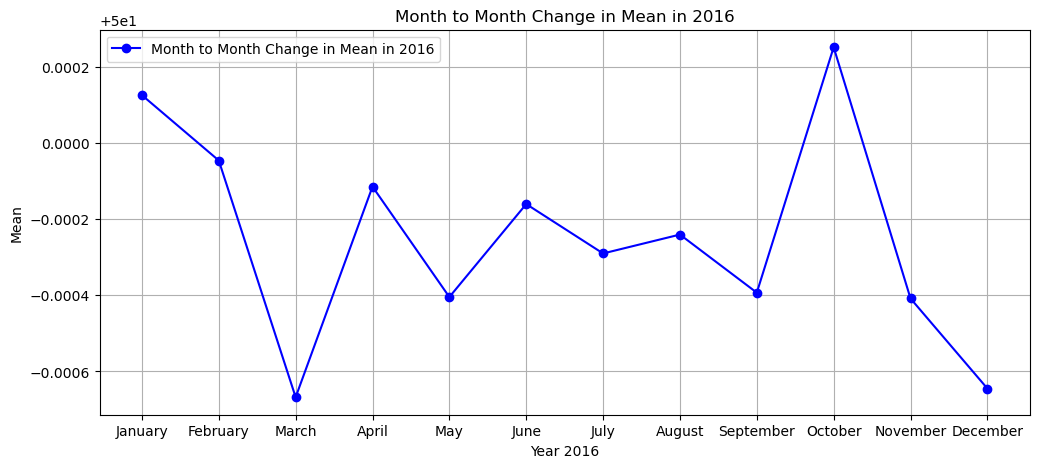

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], mean[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Mean in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Mean')
plt.title(f'Month to Month Change in Mean in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

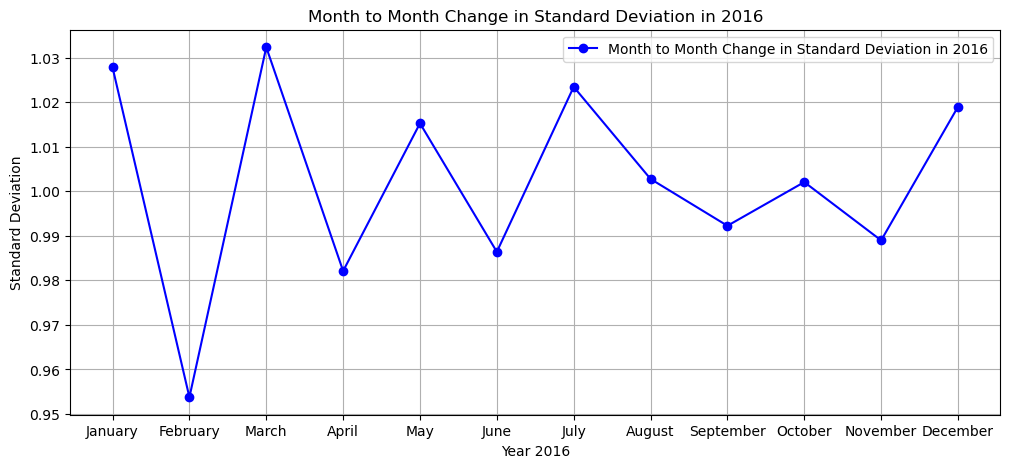

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], stdev[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Standard Deviation in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Standard Deviation')
plt.title(f'Month to Month Change in Standard Deviation in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

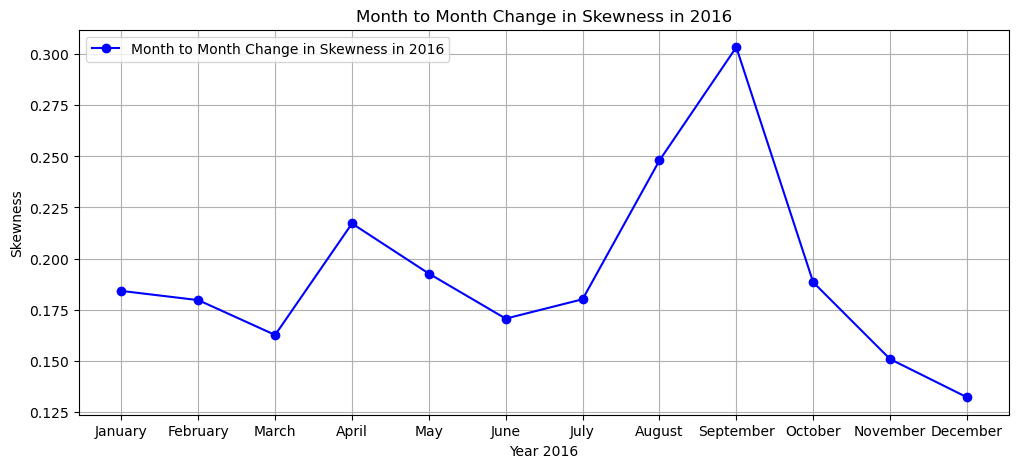

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], skew[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Skewness in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Skewness')
plt.title(f'Month to Month Change in Skewness in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

### Crosstables
Crosstables for metrics such as mean, standard deviation, skewness and CPS1 score for all the months and years are created.  
They provide an overview of how specific metrics change over months within a year and allow easy year-to-year comparisons.

In [17]:
mean_v = []
std_dev = []
sk_ew =[]
for j in range(3):
    for i in range(12):
        alt = df[j][i]
        mean_v.append(alt['f'].mean())
        std_dev.append(alt['f'].std())
        sk_ew.append(alt['f'].skew())

In [18]:
df_10min = []
for j in range(3):
    for i in range(12): 
        df[j][i]['dtm'] = pd.to_datetime(df[j][i]['dtm'], utc=True)
        df_10min.append(df[j][i].resample('10T', on='dtm').mean())

C:\Users\ginobili\AppData\Local\Temp\ipykernel_12652\1720712770.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10min.append(df[j][i].resample('10T', on='dtm').mean())
C:\Users\ginobili\AppData\Local\Temp\ipykernel_12652\1720712770.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10min.append(df[j][i].resample('10T', on='dtm').mean())
C:\Users\ginobili\AppData\Local\Temp\ipykernel_12652\1720712770.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10min.append(df[j][i].resample('10T', on='dtm').mean())
C:\Users\ginobili\AppData\Local\Temp\ipykernel_12652\1720712770.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10min.append(df[j][i].resample('10T', on='dtm').mean())
C:\Users\ginobili\AppData\Local\Temp\ipykernel_12652\1720712770.py:5: Future

In [19]:
for i in range(len(df_10min)):
    df_10min[i]['del_f'] = df_10min[i]['f'] - 50

In [20]:
cps1 = []
df1_10min = df_10min
e1 = 0.12
for i in range(len(df1_10min)):
    cps_ratio = df1_10min[i]['del_f'] * df1_10min[i]['del_f'] / (e1 ** 2)
    cps = (2 - cps_ratio)*100
    cps1.append(cps.to_frame(name='cps'))

In [21]:
mean_cps1 = []
meancps1 = 0
i = 0
for i in range(len(df1_10min)):
    mean_cps1.append(cps1[i]['cps'].mean())

In [22]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2018, 12, 1)
date_list = []
while start_date <= end_date:
    date_str = start_date.strftime('%B %Y')
    date_list.append(date_str)
    start_date += timedelta(days=31)
    start_date = start_date.replace(day=1)

In [23]:
years = list(range(2016, 2019))  
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [24]:
data = {
    'Year': np.repeat(years, len(months)),
    'Month': months * len(years),
    'Mean': mean_v,
    'Standard Deviation': std_dev,
    'Skewness': sk_ew,
    'CPS1 score': mean_cps1
}

In [25]:
dff = pd.DataFrame(data)

In [26]:
mean_crosstable = dff.pivot(index='Month', columns='Year', values='Mean')
std_crosstable = dff.pivot(index='Month', columns='Year', values='Standard Deviation')
skew_crosstable = dff.pivot(index='Month', columns='Year', values='Skewness')
cps1_crosstable = dff.pivot(index='Month', columns='Year', values='CPS1 score')
mean_crosstable_str = mean_crosstable.to_string()
std_crosstable_str = std_crosstable.to_string()
skew_crosstable_str = skew_crosstable.to_string()
cps1_crosstable_str = cps1_crosstable.to_string()

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [28]:
print("Mean Crosstable:")
print(mean_crosstable_str)

Mean Crosstable:
Year        2016       2017       2018
Month                                 
Apr    49.999886  49.999542  50.000671
Aug    49.999760  49.999725  49.999870
Dec    49.999355  49.999798  50.000088
Feb    49.999954  49.999676  49.999046
Jan    50.000126  49.999775  49.998268
Jul    49.999710  49.999832  49.999409
Jun    49.999840  49.999714  50.000587
Mar    49.999332  49.999691  49.998421
May    49.999596  49.999458  49.998764
Nov    49.999592  49.999886  49.999401
Oct    50.000252  49.999844  50.000671
Sep    49.999607  49.999912  49.999363


In [29]:
print("Standard Deviation Crosstable:")
print(std_crosstable_str)

Standard Deviation Crosstable:
Year       2016      2017      2018
Month                              
Apr    0.982089  0.990639  1.006487
Aug    1.002744  1.017061  0.995074
Dec    1.018947  1.011913  1.002920
Feb    0.953757  0.906036  0.941782
Jan    1.027782  1.024301  1.023098
Jul    1.023417  1.035922  1.022396
Jun    0.986390  1.028820  1.003839
Mar    1.032314  1.024097  1.045210
May    1.015234  1.019664  1.031061
Nov    0.988959  0.972825  0.998863
Oct    1.002044  0.988327  1.000642
Sep    0.992238  1.031192  0.982642


In [30]:
print("\nSkewness Crosstable:")
print(skew_crosstable_str)


Skewness Crosstable:
Year       2016      2017      2018
Month                              
Apr    0.217154  0.135294  0.173611
Aug    0.248019  0.160047  0.080792
Dec    0.132079  0.143847  0.027416
Feb    0.179629  0.175180  0.210985
Jan    0.184137  0.141553  0.192764
Jul    0.180049  0.167786  0.132517
Jun    0.170570  0.242695  0.225854
Mar    0.162572  0.155781  0.258984
May    0.192619  0.162235  0.274101
Nov    0.150778  0.084164  0.065809
Oct    0.188405  0.214123  0.031424
Sep    0.303479  0.220359  0.103189


In [31]:
print("\nCPS1 score Crosstable:")
print(cps1_crosstable_str)


CPS1 score Crosstable:
Year         2016        2017        2018
Month                                    
Apr    183.996201  184.516281  181.385391
Aug    186.952255  183.442032  181.345306
Dec    185.348511  182.996033  180.037445
Feb    185.683640  181.742096  180.694016
Jan    184.723755  184.840958  182.318665
Jul    186.201004  184.388245  182.062576
Jun    187.295776  183.947220  181.632950
Mar    185.523132  182.429382  179.868927
May    185.692612  184.486923  182.894455
Nov    185.200119  183.108994  177.509521
Oct    186.462555  181.964569  178.959198
Sep    185.969696  183.100433  179.720093


### Purpose of month-to-month analysis

1. Comparative Analysis:
    - Allow quick comparisons between months within the same year.
    - Enable cross-year comparisons for the same month (e.g., January 2016 vs. January 2018).


2. Trend Identification:

   Help identify long-term trends, such as:
    - Increasing variability (standard deviation) over years.
    - Changes in distribution symmetry (skewness) over time.
    - Seasonal or cyclical patterns in frequency (e.g., high means in summer months).


3. Summarized Insights:
    - Provide a clear, high-level summary of key metrics without requiring extensive manual exploration of raw data.
   


---

## Yearly Data Aggegration
- Data for each year (2016–2018) is stored as separate dataframes (df_2016, df_2017, etc.).
- Monthly data within each year is concatenated to create a complete yearly dataset.
- All yearly datasets are appended to a list yearsData for easier iteration and analysis.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_2018 = pd.concat(df18).reset_index(drop=True)

In [34]:
df_2017 = pd.concat(df17).reset_index(drop=True)

In [35]:
df_2016 = pd.concat(df16).reset_index(drop=True)

In [36]:
yearsData =[]
yearsData.append(df_2016)
yearsData.append(df_2017)
yearsData.append(df_2018)

### Computation of Metrics:
For each year, the following statistics are calculated:
- Mean
- Standard Deviation
- Skewness

The yearly mean, standard deviation, and skewness are displayed in ascending order for quick inspection.

In [37]:
mean = []
for i in range(3):
    var = yearsData[i]
    mean.append(var['f'].mean())
print('The MEAN of the yearly data from 2016 to 2018 in ascending order is:')
mean

The MEAN of the yearly data from 2016 to 2018 in ascending order is:


[49.999775, 49.9998, 49.999474]

In [38]:
stdev = []
for i in range(3):
    var1 = yearsData[i]
    stdev.append(var1['f'].std())
print('The STANDARD DEVIATION of the yearly data from 2016 to 2018 in ascending order is:')
stdev

The STANDARD DEVIATION of the yearly data from 2016 to 2018 in ascending order is:


[16.481529235839844, 13.740915298461914, 14.07370376586914]

In [39]:
skew = []
for i in range(3):
    var2 = yearsData[i]
    skew.append(var2['f'].skew())
print('The SKEWNESS of the yearly data from 2016 to 2018 in ascending order is:')
skew

The SKEWNESS of the yearly data from 2016 to 2018 in ascending order is:


[0.1913346, 0.16806537, 0.14315064]

In [40]:
years = ['2016','2017','2018']

### Visualization of Yearly Trends
Three separate line plots are created to illustrate:
- Changes in mean over the years.
- Trends in standard deviation across years.
- Variations in skewness across the dataset for each year.

These plots help visualize how the frequency variable (f) evolves from 2016 to 2018.

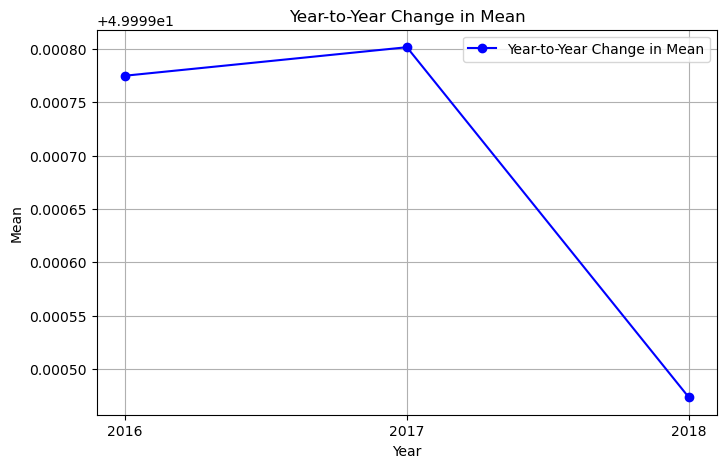

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], mean[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Mean')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Year-to-Year Change in Mean')
plt.grid(True)
plt.legend()
plt.show()

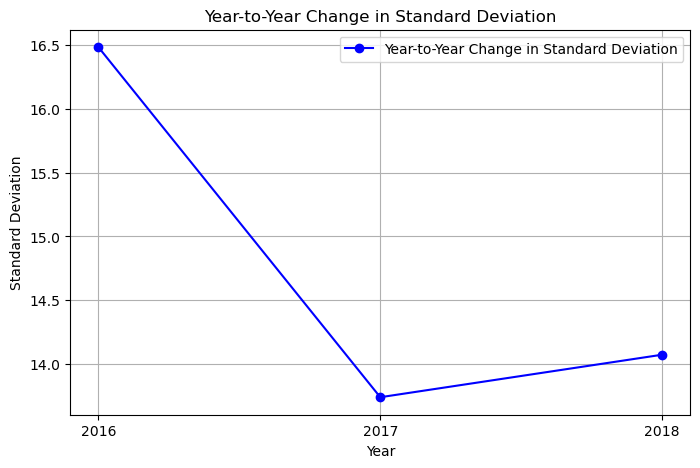

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], stdev[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Year-to-Year Change in Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

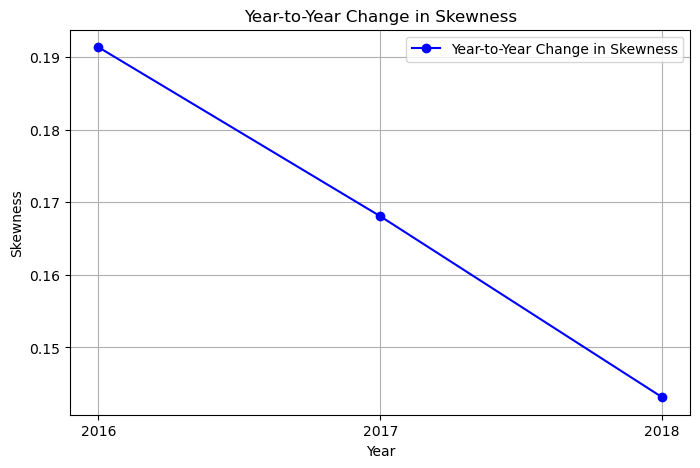

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], skew[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Skewness')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.title('Year-to-Year Change in Skewness')
plt.grid(True)
plt.legend()
plt.show()

## Conclusion
We have built a powerful tool for exploring, analyzing, and visualizing frequency data. By combining user interactivity, detailed analysis, and aggregated insights, it provides a flexible and reusable framework for understanding time-series data across multiple timeframes.